# Step 1: Setup imports and data

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix
df_articles = pd.read_csv("shared_articles.csv")
df_inter = pd.read_csv("users_interactions.csv")



df_articles
# df_inter

,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,1487946604,CONTENT SHARED,9213260650272029784,3609194402293569455,7144190892417579456,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,SP,BR,HTML,https://startupi.com.br/2017/02/liga-ventures-...,"Conheça a Liga IoT, plataforma de inovação abe...","A Liga Ventures, aceleradora de startups espec...",pt
3118,1487947067,CONTENT SHARED,-3295913657316686039,6960073744377754728,-8193630595542572738,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_3...,GA,US,HTML,https://thenextweb.com/apps/2017/02/14/amazon-...,Amazon takes on Skype and GoToMeeting with its...,"Amazon has launched Chime, a video conferencin...",en
3119,1488223224,CONTENT SHARED,3618271604906293310,1908339160857512799,-183341653743161643,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0...,SP,BR,HTML,https://code.org/about/2016,Code.org 2016 Annual Report,"February 9, 2017 - We begin each year with a l...",en
3120,1488300719,CONTENT SHARED,6607431762270322325,-1393866732742189886,2367029511384577082,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,MG,BR,HTML,https://www.bloomberg.com/news/articles/2017-0...,JPMorgan Software Does in Seconds What Took La...,"At JPMorgan Chase & Co., a learning machine is...",en


In [16]:
#personId = user
#contentId = item
#eventType = rating (ordinal)

In [17]:

for item in df_inter["eventType"].unique(): # For testing
    print(item)



VIEW
FOLLOW
BOOKMARK
LIKE
COMMENT CREATED


In [18]:
# Change the eventType to be ordinal
# VIEW = 1
# FOLLOW = 2
# BOOKMARK = 3 
# LIKE = 4
# COMMENT CREATED = 5

event_type_mapping = {
    'VIEW': 1,
    'LIKE': 2,
    'FOLLOW': 3,
    'BOOKMARK': 4,
    'COMMENT CREATED': 5
}

df_inter['eventType'] = df_inter['eventType'].map(event_type_mapping)

df_inter

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,1,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,1,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,1,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,3,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,1,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,2,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,1,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,1,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,1,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


<Axes: xlabel='eventType', ylabel='Count'>

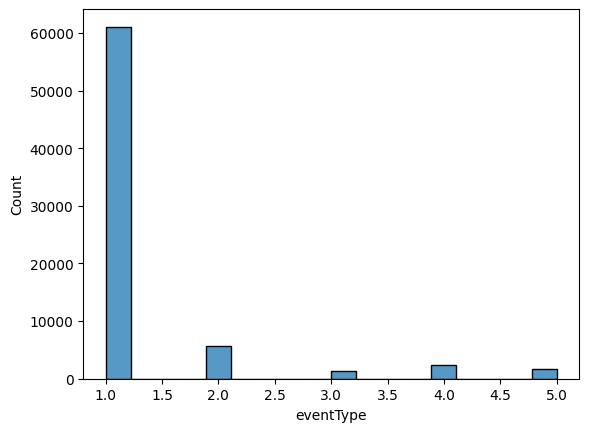

In [19]:
sns.histplot(data=df_inter, x="eventType")

In [20]:
print("Number of ratings: {}".format(df_inter.shape[0]))
print("Number of articles: {}".format(df_inter.contentId.nunique()))
print("Number of consumers: {}".format(df_inter.personId.nunique()))
print("Number of POssible Ratings: {}".format(df_inter.contentId.nunique() * df_inter.personId.nunique()))
print("Sparseness: {}".format(1 - (df_inter.shape[0] / (df_inter.contentId.nunique() * df_inter.personId.nunique() ))))


Number of ratings: 72312
Number of articles: 2987
Number of consumers: 1895
Number of POssible Ratings: 5660365
Sparseness: 0.9872248521075938


In [21]:
df_articles.contentId.value_counts()

contentId
-2990485643677949494    3
 756136904399885845     2
 7420742904084384944    2
 8219310215587599928    2
-6878119266243511199    2
                       ..
-6727393385193911938    1
 7351002593233940239    1
 1083474613819325601    1
-4994468824009200256    1
-6451309518266745024    1
Name: count, Length: 3057, dtype: int64

In [22]:
# Min: 1: The least number of interactions any single piece of content has received is 1.
# Quartile 1 (Q1): 6.0: 25% of the content has 6 or fewer interactions.
# Median: 14.0: 50% of the content has 14 or fewer interactions. This is the middle value.
# Quartile 3 (Q3): 30.0: 75% of the content has 30 or fewer interactions.
# Max: 433: The most number of interactions any single piece of content has received is 433.
# For personId:
# Min: 1: The least number of interactions any single person has made is 1.
# Quartile 1 (Q1): 3.0: 25% of the people have made 3 or fewer interactions.
# Median: 10.0: 50% of the people have made 10 or fewer interactions. This is the middle value.
# Quartile 3 (Q3): 32.0: 75% of the people have made 32 or fewer interactions.
# Max: 1885: The most number of interactions any single person has made is 1885.

# number of interactions any single piece of content has received (i.e. likes, views, follows, bookmark, comment)
print('Min:\t\t', df_inter['contentId'].value_counts().min()) 
print('Quartile 1:\t', df_inter['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['contentId'].value_counts().max())
print()

# number of interactions any single person has made (i.e. who's on social media a lot)
print('Min:\t\t', df_inter['personId'].value_counts().min())
print('Quartile 1:\t', df_inter['personId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['personId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['personId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['personId'].value_counts().max())

Min:		 1
Quartile 1:	 6.0
Median:		 14.0
Quartile 3:	 30.0
Max:		 433

Min:		 1
Quartile 1:	 3.0
Median:		 10.0
Quartile 3:	 32.0
Max:		 1885


In [23]:
value_counts = df_inter['contentId'].value_counts()
keep_list = value_counts[value_counts >= 6]
#display(keep_list)
df_inter = df_inter.loc[df_inter['contentId'].isin(keep_list.index)]
print("Number of articles kept: {}".format(keep_list.shape[0]))
print("Total articles: {}".format(df_inter.shape[0]))

print('Min:\t\t', df_inter['contentId'].value_counts().min())
print('Quartile 1:\t', df_inter['contentId'].value_counts().quantile(.25))
print('Median:\t\t', df_inter['contentId'].value_counts().quantile(.5))
print('Quartile 3:\t', df_inter['contentId'].value_counts().quantile(.75))
print('Max:\t\t', df_inter['contentId'].value_counts().max())

Number of articles kept: 2283
Total articles: 70273
Min:		 6
Quartile 1:	 11.0
Median:		 20.0
Quartile 3:	 36.5
Max:		 433


In [30]:
df_inter

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [24]:
# Count the number of users and items
U = df_inter.personId.nunique()
I = df_inter.contentId.nunique()

# Match the actual user and item IDs with consequtive intergers from 0 to n
user_mapper = dict(zip(np.unique(df_inter.personId), list(range(U))))
item_mapper = dict(zip(np.unique(df_inter.contentId), list(range(I))))

# Reverse the mapping
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_inter.personId)))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_inter.contentId)))

# Create lists of users/items for each rating
user_index = [user_mapper[i] for i in df_inter['personId']]
item_index = [item_mapper[i] for i in df_inter['contentId']]

X = csr_matrix((df_inter['eventType'], (item_index, user_index)), shape=(I, U))
print(U, I)
print(user_mapper)
print(user_inv_mapper)
print(user_index)
print(X)

1885 2283
{np.int64(-9223121837663643404): 0, np.int64(-9212075797126931087): 1, np.int64(-9207251133131336884): 2, np.int64(-9199575329909162940): 3, np.int64(-9196668942822132778): 4, np.int64(-9188188261933657343): 5, np.int64(-9172914609055320039): 6, np.int64(-9156344805277471150): 7, np.int64(-9150583489352258206): 8, np.int64(-9120685872592674274): 9, np.int64(-9109785559521267180): 10, np.int64(-9099478998637725255): 11, np.int64(-9083704948999852989): 12, np.int64(-9063420486253202900): 13, np.int64(-9060214117327732109): 14, np.int64(-9048557723087354030): 15, np.int64(-9047547311469006438): 16, np.int64(-9016528795238256703): 17, np.int64(-9012030317377670760): 18, np.int64(-9009798162809551896): 19, np.int64(-9001583565812478106): 20, np.int64(-8994220765455693336): 21, np.int64(-8985529623369322698): 22, np.int64(-8984152171875293281): 23, np.int64(-8965597312806628567): 24, np.int64(-8965390025652957482): 25, np.int64(-8961797610770561652): 26, np.int64(-89096687256537431

In [25]:
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_inter, 'personId', 'contentId', 'eventType')

In [26]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
  from sklearn.neighbors import NearestNeighbors

  rec_ids = []                # Make a list for the recommended item IDs we'll get later
  item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
  item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

  # Fit the clustering algorithm based on the user-item matrix X
  knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

  # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
  rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
  rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
  rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
  rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

  # We need to replace the recommended item indeces with their original item IDs
  for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
    rec_ids.append(item_inv_mapper[rec_indeces[i]])

  # It may help to see what this is. The distance list is first and the recommended item indeces are second
  if messages:
    print(f'List of recommended item indeces:\n{rec_indeces}\n')
    print(f'List of recommended item IDs:\n{rec_ids}\n')
    print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

  # Return two lists: the original item IDs of the recommendations and their similarity scores
  return rec_ids, rec_distances

In [31]:
# Use any movie id here to get recommendations
contentId = 310515487419366995
rec_ids, rec_distances = recommend(contentId, X, item_mapper, item_inv_mapper, k=10) #k= number of recommendations

print(f"If you like {df_articles.loc[contentId, 'title']}, you may also enjoy:\n")
print(f"\t{df_articles.loc[rec_ids, 'title']}")

List of recommended item indeces:
[1165  132   39  183   72 2275 1551  845 1479 1446 1494]

List of recommended item IDs:
[np.int64(-8311338126170554747), np.int64(-9002191823887486987), np.int64(-7891960098457323262), np.int64(-8800029253812071912), np.int64(9207286802575546269), np.int64(3320201327008235211), np.int64(-2252459228396350242), np.int64(2841458704671711663), np.int64(2602738827388230683), np.int64(2917561522815946740)]

List of recommended item similarity to selected item:
[0.43613311 0.44065777 0.473807   0.4772989  0.49978098 0.50207805
 0.50381924 0.50462432 0.50564818 0.50718423]



KeyError: 310515487419366995